In [1]:
import pandas as pd

import matplotlib.pyplot as plt

## for correlation matrices
import seaborn as sns
%matplotlib inline

## for linear models
import statsmodels.api as sm

In [2]:
## read the dataset mpg exercise.xls as df
## note that this is an xls file
df = pd.read_excel('mpg excercise.xls')
df.head()

,MPG Highway,Passengers,Length,Wheelbase,Width,U Turn Space,Rear seat,Luggage,Weight,Horsepower,Fueltank
0,31,5,177,102,68,37,26.5,11,2705,140,13.2
1,25,5,195,115,71,38,30.0,15,3560,200,18.0
2,26,5,180,102,67,37,28.0,14,3375,172,16.9
3,26,6,193,106,70,37,31.0,17,3405,172,21.1
4,30,4,186,109,69,39,27.0,13,3640,208,21.1


In [3]:
df.shape

(93, 11)

In [4]:
# Define the problem
outcome = 'MPG_Highway'
x_cols = ['Passengers', 'Length', 'Wheelbase', 'Width', 'U_Turn_Space',
          'Rear_seat', 'Luggage', 'Weight', 'Horsepower', 'Fueltank']

In [5]:
# Some brief preprocessing
df.columns = [col.replace(' ', '_') for col in df.columns]
for col in x_cols:
    ## This is called standard scaling 
    ## Here we don't have to do this but still it is a good practice
    df[col] = (df[col] - df[col].mean())/df[col].std()
df.head()

,MPG_Highway,Passengers,Length,Wheelbase,Width,U_Turn_Space,Rear_seat,Luggage,Weight,Horsepower,Fueltank
0,31,-0.082794,-0.424883,-0.285386,-0.364210,-0.607145,-0.456945,-0.992270,-0.623674,-0.073088,-1.056458
1,25,-0.082794,0.807793,1.620864,0.429654,-0.296901,0.723496,0.326032,0.825733,1.072509,0.407238
2,26,-0.082794,-0.219437,-0.285386,-0.628831,-0.607145,0.048958,-0.003544,0.512118,0.537897,0.071808
3,26,0.879689,0.670829,0.301153,0.165033,-0.607145,1.060764,0.985183,0.562975,0.537897,1.352541
4,30,-1.045278,0.191455,0.741057,-0.099589,0.013344,-0.288310,-0.333119,0.961350,1.225256,1.352541


In [6]:
## Fit a simple linear regression 
## Use X ~ Passengers and Y~MPG_Highway
X = df['Passengers'].values
y = df['MPG_Highway'].values
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst=True)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     25.30
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           2.46e-06
Time:                        15:41:18   Log-Likelihood:                -275.70
No. Observations:                  93   AIC:                             555.4
Df Residuals:                      91   BIC:                             560.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.0860      0.492     59.149      0.000      28.109      30.063
x1            -2.4866      0.494     -5.030      0.000      -3.469      -1.505
==============================================================================
Omnibus:                       19.691   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.868
Skew:                           0.826   Prob(JB):                     1.63e-08
Kurtosis:                       5.554   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# %load -r 1-6 answers.py
X_passengers = df.Passengers.values
y = df.MPG_Highway
X_passengers = sm.add_constant(X_passengers)
model = sm.OLS(y, X_passengers, hasconst=True)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MPG_Highway   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     25.30
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           2.46e-06
Time:                        15:41:57   Log-Likelihood:                -275.70
No. Observations:                  93   AIC:                             555.4
Df Residuals:                      91   BIC:                             560.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.0860      0.492     59.149      0.000      28.109      30.063
x1            -2.4866      0.494     -5.030      0.000      -3.469      -1.505
==============================================================================
Omnibus:                       19.691   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.868
Skew:                           0.826   Prob(JB):                     1.63e-08
Kurtosis:                       5.554   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It loooks like the predictor 'Passengers' explained 0.218 percent of the variance in the response variable
'MPG_Highway'. As we see the coefficient's p_value is very small, that means we have strong evidence that 
the relationship between 'Passengers' and 'MPG_'Highway' is not coincidence.

Now let's use the other variables to improve the model.

In [9]:
df.columns

Index(['MPG_Highway', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'U_Turn_Space', 'Rear_seat', 'Luggage', 'Weight', 'Horsepower',
       'Fueltank'],
      dtype='object')

In [10]:
## Now use all the variables to fit a multiple linear regression model
X = df[['Passengers', 'Length', 'Wheelbase', 'Width',
       'U_Turn_Space', 'Rear_seat', 'Luggage', 'Weight', 'Horsepower',
       'Fueltank']].values
y = df['MPG_Highway'].values
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst=True)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     24.03
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           2.02e-20
Time:                        15:43:18   Log-Likelihood:                -223.47
No. Observations:                  93   AIC:                             468.9
Df Residuals:                      82   BIC:                             496.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.0860      0.295     98.465      0.000      28.498      29.674
x1            -1.0138      0.577     -1.757      0.083      -2.162       0.134
x2             0.4625      0.624      0.741      0.461      -0.779       1.704
x3             1.9899      0.833      2.389      0.019       0.333       3.647
x4             1.2067      0.759      1.591      0.115      -0.302       2.716
x5            -0.4858      0.545     -0.892      0.375      -1.570       0.598
x6             0.2338      0.459      0.509      0.612      -0.679       1.147
x7             0.3229      0.447      0.723      0.472      -0.566       1.212
x8            -5.2787      1.220     -4.327      0.000      -7.705      -2.852
x9            -0.1101      0.660     -0.167      0.868      -1.422       1.202
x10           -1.6742      0.703     -2.383      0.019      -3.072      -0.276
==============================================================================
Omnibus:                       15.867   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.638
Skew:                           0.749   Prob(JB):                     7.36e-06
Kurtosis:                       4.963   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# %load -r 10-20 answers.py
X = df.drop(columns='MPG_Highway').values

y = df.MPG_Highway

# Fitting the actual model
X = sm.add_constant(X)
model = sm.OLS(y, X, hasconst=True )
result = model.fit()
labels = ['intercept'] + x_cols
print(labels)
result.summary(xname=labels)

['intercept', 'Passengers', 'Length', 'Wheelbase', 'Width', 'U_Turn_Space', 'Rear_seat', 'Luggage', 'Weight', 'Horsepower', 'Fueltank']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MPG_Highway   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     24.03
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           2.02e-20
Time:                        15:43:30   Log-Likelihood:                -223.47
No. Observations:                  93   AIC:                             468.9
Df Residuals:                      82   BIC:                             496.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       29.0860      0.295     98.465      0.000      28.498      29.674
Passengers      -1.0138      0.577     -1.757      0.083      -2.162       0.134
Length           0.4625      0.624      0.741      0.461      -0.779       1.704
Wheelbase        1.9899      0.833      2.389      0.019       0.333       3.647
Width            1.2067      0.759      1.591      0.115      -0.302       2.716
U_Turn_Space    -0.4858      0.545     -0.892      0.375      -1.570       0.598
Rear_seat        0.2338      0.459      0.509      0.612      -0.679       1.147
Luggage          0.3229      0.447      0.723      0.472      -0.566       1.212
Weight          -5.2787      1.220     -4.327      0.000      -7.705      -2.852
Horsepower      -0.1101      0.660     -0.167      0.868      -1.422       1.202
Fueltank        -1.6742      0.703     -2.383      0.019      -3.072      -0.276
==============================================================================
Omnibus:                       15.867   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.638
Skew:                           0.749   Prob(JB):                     7.36e-06
Kurtosis:                       4.963   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note that the $R^{2}$ and $R^{2}$_adjusted increased significantly but at the same time some predictors p_values are not significant anymore.

In [13]:
## Now focus on the columns with significant p_values

cols_subset = ['Passengers', 'Wheelbase', 'Weight', 'Fueltank']

## Let's fit another model with only these columns
## compare the results
X = df[cols_subset].values
y = df['MPG_Highway'].values
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst=True)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     58.19
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           6.35e-24
Time:                        15:44:28   Log-Likelihood:                -226.97
No. Observations:                  93   AIC:                             463.9
Df Residuals:                      88   BIC:                             476.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.0860      0.296     98.232      0.000      28.498      29.674
x1            -1.0457      0.418     -2.501      0.014      -1.877      -0.215
x2             2.8249      0.713      3.960      0.000       1.407       4.243
x3            -4.9206      0.894     -5.505      0.000      -6.697      -3.144
x4            -1.4385      0.668     -2.154      0.034      -2.766      -0.111
==============================================================================
Omnibus:                       10.649   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               15.761
Skew:                           0.489   Prob(JB):                     0.000378
Kurtosis:                       4.763   Cond. No.                         6.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# %load -r 24-30 answers.py
X = df[cols_subset].values
X = sm.add_constant(X)
model = sm.OLS(y, X, hasconst=True, )
result = model.fit()
cols_subset = ['intercept'] + cols_subset
print(cols_subset)
result.summary(xname = cols_subset)

['intercept', 'Passengers', 'Wheelbase', 'Weight', 'Fueltank']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     58.19
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           6.35e-24
Time:                        15:44:34   Log-Likelihood:                -226.97
No. Observations:                  93   AIC:                             463.9
Df Residuals:                      88   BIC:                             476.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     29.0860      0.296     98.232      0.000      28.498      29.674
Passengers    -1.0457      0.418     -2.501      0.014      -1.877      -0.215
Wheelbase      2.8249      0.713      3.960      0.000       1.407       4.243
Weight        -4.9206      0.894     -5.505      0.000      -6.697      -3.144
Fueltank      -1.4385      0.668     -2.154      0.034      -2.766      -0.111
==============================================================================
Omnibus:                       10.649   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               15.761
Skew:                           0.489   Prob(JB):                     0.000378
Kurtosis:                       4.763   Cond. No.                         6.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
cols_subset = ['Wheelbase', 'Weight', 'Fueltank']

## Let's fit another model with only these columns
## compare the results
X = df[cols_subset].values
y = df['MPG_Highway'].values
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst=True)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     71.29
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           1.38e-23
Time:                        16:04:22   Log-Likelihood:                -230.16
No. Observations:                  93   AIC:                             468.3
Df Residuals:                      89   BIC:                             478.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.0860      0.305     95.454      0.000      28.481      29.691
x1             1.9035      0.629      3.027      0.003       0.654       3.153
x2            -4.7112      0.916     -5.144      0.000      -6.531      -2.891
x3            -1.4212      0.687     -2.068      0.042      -2.787      -0.056
==============================================================================
Omnibus:                       14.482   Durbin-Watson:                   1.465
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.083
Skew:                           0.671   Prob(JB):                     1.60e-05
Kurtosis:                       4.974   Cond. No.                         6.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Again the last model with only four variables worked almost as good as the previous one which had  11 predictors ($R_{adj} = 0.715$ vs $R_{adj} = 0.713$). For more on this read p74 of ISLR.

### Multicollinearity

As we discussed before the multicollinearity is a problem for interprettability and confidence intervels. Now we will see how to detect multicolinearity and how to solve this problem.

[Statistics by Jim - Multicollinearity in linear regression](https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/)


[Wikipedia VIF - Calculation and Analysis](https://en.wikipedia.org/wiki/Variance_inflation_factor)

In [17]:
## One way of detecting multicollinearity is Variance inflation factor.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
refined_cols = ['Passengers', 'Wheelbase', 'Weight', 'Fueltank']
X = df[refined_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(refined_cols, vif))

[('Passengers', 1.9723303443573645),
 ('Wheelbase', 5.743165022553869),
 ('Weight', 9.016035842933373),
 ('Fueltank', 5.032060527995971)]

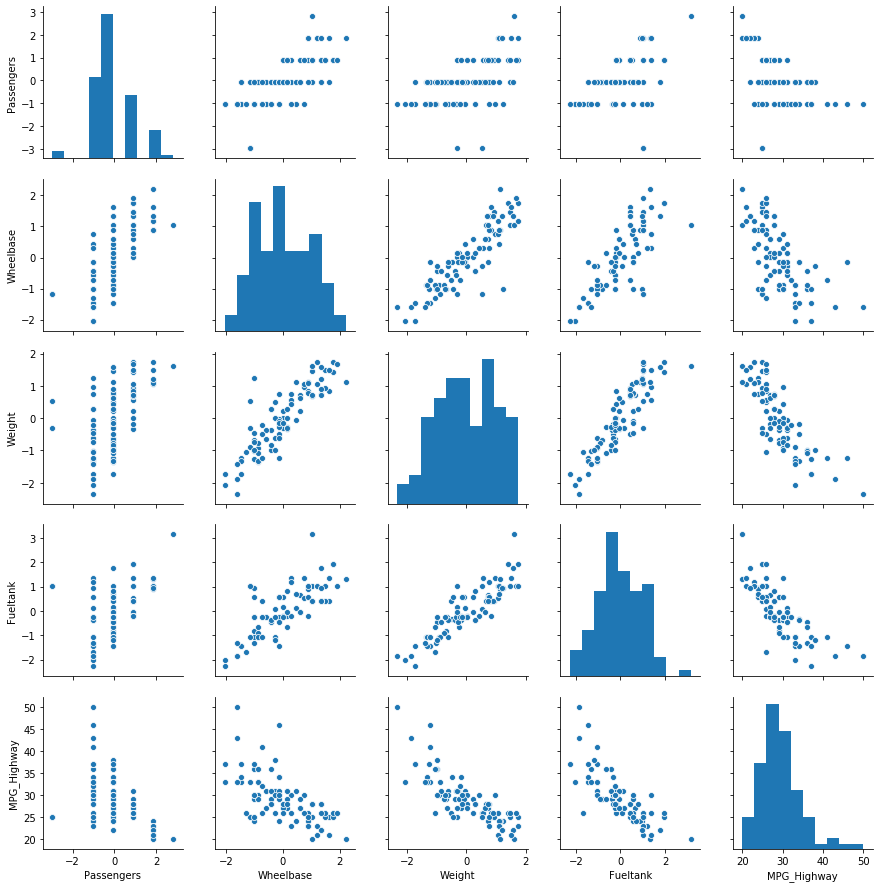

In [24]:
from pandas.plotting import scatter_matrix
import seaborn as sns
# scatter_matrix(df[['Fueltank', 'Weight', 'Wheelbase', 'MPG_Highway']]);

sns.pairplot(df[refined_cols+['MPG_Highway']]);

In [30]:
## Check the above link from wikipedia
## and try to figure out what the vif score corresponds to. 

# the higher the VIF of a given parameter the more the other parameters describe the effect of the given parameter, 
# meaning it is relatively redundant

# you are fitting a linear model of all other parameters to each given parameter

## Let's try show very quickly that our
## interpretation is correct
## We will focus on vif score for 
## Passenger variable only.

In [21]:
# %load -r 35-50 answers.py
## take the passenger as target
y_vif = df.Passengers
## remove Passenger from predictor list
refined_cols.remove('Passengers')
## prepare data for the linear model
X_vif = df[refined_cols]
## add intercept term
X_vif = sm.add_constant(X_vif.values)
## fit model
model_vif = sm.OLS(y_vif, X_vif, hasconst=True)
result_vif = model_vif.fit()
## check the r2-score
result_vif.summary()
## calculate vif score directly from r2-score
passenger_vif = 1/(1 - result_vif.rsquared)
passenger_vif

1.972330344357365

In [29]:
X = df.Weight.values
y = df.MPG_Highway
X = sm.add_constant(X)
model = sm.OLS(y, X, hasconst=True)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MPG_Highway   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     174.4
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           7.18e-23
Time:                        16:39:44   Log-Likelihood:                -237.33
No. Observations:                  93   AIC:                             478.7
Df Residuals:                      91   BIC:                             483.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.0860      0.325     89.360      0.000      28.439      29.733
x1            -4.3222      0.327    -13.207      0.000      -4.972      -3.672
==============================================================================
Omnibus:                       18.951   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.353
Skew:                           0.825   Prob(JB):                     9.43e-08
Kurtosis:                       5.373   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
X_passengers = df[['Weight', 'Wheelbase']].values
y = df.MPG_Highway
X_passengers = sm.add_constant(X_passengers)
model = sm.OLS(y, X_passengers, hasconst=True)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MPG_Highway   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     101.1
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           9.62e-24
Time:                        16:43:03   Log-Likelihood:                -232.35
No. Observations:                  93   AIC:                             470.7
Df Residuals:                      90   BIC:                             478.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.0860      0.310     93.762      0.000      28.470      29.702
x1            -6.0946      0.637     -9.569      0.000      -7.360      -4.829
x2             2.0328      0.637      3.192      0.002       0.767       3.298
==============================================================================
Omnibus:                       10.896   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               13.568
Skew:                           0.590   Prob(JB):                      0.00113
Kurtosis:                       4.453   Cond. No.                         3.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
X_passengers = df[['Weight', 'Wheelbase', 'Fueltank']].values
y = df.MPG_Highway
X_passengers = sm.add_constant(X_passengers)
model = sm.OLS(y, X_passengers, hasconst=True)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MPG_Highway   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     71.29
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           1.38e-23
Time:                        16:42:43   Log-Likelihood:                -230.16
No. Observations:                  93   AIC:                             468.3
Df Residuals:                      89   BIC:                             478.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.0860      0.305     95.454      0.000      28.481      29.691
x1            -4.7112      0.916     -5.144      0.000      -6.531      -2.891
x2             1.9035      0.629      3.027      0.003       0.654       3.153
x3            -1.4212      0.687     -2.068      0.042      -2.787      -0.056
==============================================================================
Omnibus:                       14.482   Durbin-Watson:                   1.465
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.083
Skew:                           0.671   Prob(JB):                     1.60e-05
Kurtosis:                       4.974   Cond. No.                         6.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the literature, you might see that it is suggested that if VIF> 10 then this column can  be dropped. Some other resources say if VIF > 5 it is ok to drop a column. Note that these corresponds to $R^{2} = 0.90$ and $R^{2} = 0.80$ respectively. In this case, we can consider to drop 'weight' feature as its VIF >5. Let's see how this effects the model.

In [26]:
X = df[['Passengers', 'Wheelbase', 'Fueltank']]
X = sm.add_constant(X.values)

model = sm.OLS(y, X, hasconst= True)

res = model.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MPG_Highway   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     50.77
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           3.21e-19
Time:                        16:28:00   Log-Likelihood:                -240.73
No. Observations:                  93   AIC:                             489.5
Df Residuals:                      89   BIC:                             499.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.0860      0.341     85.203      0.000      28.408      29.764
x1            -0.8302      0.480     -1.730      0.087      -1.784       0.123
x2             0.4075      0.648      0.629      0.531      -0.881       1.696
x3            -4.1077      0.529     -7.759      0.000      -5.160      -3.056
==============================================================================
Omnibus:                       25.731   Durbin-Watson:                   1.417
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.037
Skew:                           1.002   Prob(JB):                     6.79e-13
Kurtosis:                       6.231   Cond. No.                         3.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After we dropped the 'weight' the score ($R_{adj}$) dropped from 0.713 to 0.619.

Also we could use forward and backward selection methods.

In [27]:
## sklearn.feature_selection has a class
## called RFE for recursive feature selection

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

For more details and the documentation of RFE you can check:

[sklearn- Recursive Feature Selectin](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)


In [41]:
## instantiate the linear regression object
lm = LinearRegression()
## instantiate the selector object
selector = RFE(lm, n_features_to_select=3)
X = df.drop(columns= 'MPG_Highway')
y = df.MPG_Highway

## fit the model
selector.fit(X,y)

## check which columns are selected
ind = selector.get_support()
print(ind)

## Note that we got different columns
X.loc[:, ind].head()

[False False  True False False False False  True False  True]


,Wheelbase,Weight,Fueltank
0,-0.285386,-0.623674,-1.056458
1,1.620864,0.825733,0.407238
2,-0.285386,0.512118,0.071808
3,0.301153,0.562975,1.352541
4,0.741057,0.961350,1.352541


In [42]:
## let's compare the R2 scores with these predictors
lm3 = selector.estimator_

R2 = lm3.score(X.loc[:, ind],y)
print(R2)

0.7061447200343105


Sklearn library returns $R^{2}$-score and we can easily convert it to an adjusted $R^{2}$ by using the formula:

$$ \bar{R}^{2} = 1 - (1- R^{2})\frac{n-1}{n-p-1}$$

where $p$ is the total number of features used to train model.

[Wikipedia-$R^{2}$](https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2)

In [43]:
## We can also calculate adjusted R2 score 
## directly from R2

In [44]:
# %load -r 54-55 answers.py
R2_adj = 1- (1-R2)*(len(y)-1)/(len(y) - 3 - 1)
print(R2_adj)

0.6962394858781636


In [46]:
# X.drop(columns= 'const', inplace = True)

X.head()

,Passengers,Length,Wheelbase,Width,U_Turn_Space,Rear_seat,Luggage,Weight,Horsepower,Fueltank
0,-0.082794,-0.424883,-0.285386,-0.364210,-0.607145,-0.456945,-0.992270,-0.623674,-0.073088,-1.056458
1,-0.082794,0.807793,1.620864,0.429654,-0.296901,0.723496,0.326032,0.825733,1.072509,0.407238
2,-0.082794,-0.219437,-0.285386,-0.628831,-0.607145,0.048958,-0.003544,0.512118,0.537897,0.071808
3,0.879689,0.670829,0.301153,0.165033,-0.607145,1.060764,0.985183,0.562975,0.537897,1.352541
4,-1.045278,0.191455,0.741057,-0.099589,0.013344,-0.288310,-0.333119,0.961350,1.225256,1.352541


## Normality of Errors and Residual Plots

In [50]:
X = df[['Weight', 'Wheelbase', 'Fueltank']]
y_predict = lm3.predict(X)

residuals = y - y_predict

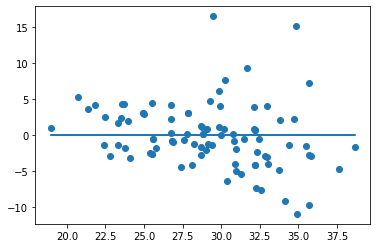

In [51]:
plt.scatter(y_predict, residuals)
plt.plot(y_predict, [0 for i in range(len(df))])

In [52]:
import scipy.stats as stats

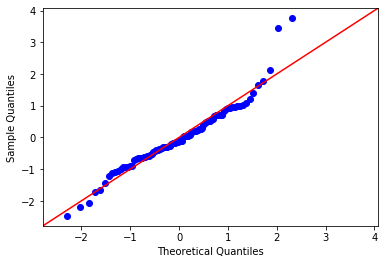

In [49]:
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

## Potential Problems in Multiple Linear Regression

In a perfect linear regression model we expect no pattern in the residual plots. In that sense, any pattern in the residual plots corresponds to a violation of assumptions.

- 1. Non-linearity of the data

U shape patter suggests that we have a non-linear relation between the predictors and the target. In thsi case adding $\log{X}$, $\sqrt{X}$ or $X^{2}$ terms to the model might be helpful.

<img src='img/non_linearity.png' width=550>

- 2. Correlation of the Error Terms 

This means the errors $\epsilon_{1}, \dots, \epsilon_{i}$ tells nothing about the error $\epsilon_{i+1}$. If we have correlation between the error terms then confidence intervals are narrower than they should be. 

- A classic example where we might get correlated errors is when we are dealing with time series data.

<img src='img/timeseries_errors.png' width=550>

- 3. Non-constant variance of the errors

Possible solutions: try $\log(Y)$ or $\sqrt{Y}$ transformations, in some cases giving weights to observations.

<img src='img/nonconstant_varience.png' width=550>

- 4. Outliers

<img src='img/outliers.png' width=550>

For more on Studentized residuals, check:

[PennState - Studentized residuals](https://newonlinecourses.science.psu.edu/stat462/node/247/)

[Statsmodel.Stats outliers_influence module documentation](https://www.statsmodels.org/devel/generated/statsmodels.stats.outliers_influence.OLSInfluence.html)


In [77]:
from statsmodels import stats

import numpy as np

In [55]:
X = sm.add_constant(X)
model  = sm.OLS(y,X)
results = model.fit()


//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


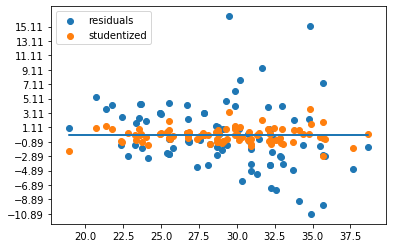

In [78]:
of = stats.outliers_influence.OLSInfluence(results)

plt.scatter(y_predict, residuals, label = 'residuals')
plt.scatter(y_predict, of.resid_studentized, label= 'studentized')
plt.plot(y_predict, [0 for i in range(len(df))])
plt.yticks(np.arange(residuals.min(), residuals.max(), 2))
plt.legend()

Typical expected values are between -3 and 3. So in that sense we can say we don't have outliers in this model.

5. High Leverage Points 

<img src='img/leverage.png' width=550>

For more details on leverage read:

    - p97 of ISLR

    - [Penn State Stats](https://newonlinecourses.science.psu.edu/stat462/node/171/)

    - [Statsmodel - Documentation](https://www.statsmodels.org/devel/generated/statsmodels.stats.outliers_influence.OLSInfluence.html)

    - [A blogpost with implementation](http://songhuiming.github.io/pages/2016/12/31/linear-regression-in-python-chapter-2/)


- 6. Collinearity

Which we discussed earlier.

## Further Reading

To address the collinearity in multiple linear regression we can also use methods like Principal Component Analysis(PCA) and Partial Least Squares (PLS).

[Wikipedia- Partial Least Squares ](https://en.wikipedia.org/wiki/Partial_least_squares_regression)

[Partial Least Squares](http://www.statsoft.com/Textbook/Partial-Least-Squares)

[sklearn - Partial Least Squares](https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.PLSRegression.html#sklearn.cross_decomposition.PLSRegression)